In [1]:
!pip install yfinance

In [2]:
!pip install pandas_datareader

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
%matplotlib inline

In [4]:
# Create start and end variables
start= datetime.datetime(2019,1,1)
end = datetime.datetime(2021,4,30)

# Gather Stock Information

In [5]:
#STOCK INFORMATION ON SELECT FIRMS IN THE CONSUMER CYCLICAL INDUSTRY BASED ON MARKET CAP


BTC= data.DataReader('BTC-USD','yahoo',start,end)
BCH= data.DataReader('BCH-USD','yahoo',start,end)
XRP= data.DataReader('XRP-USD','yahoo',start,end)
DOGE= data.DataReader('DOGE-USD','yahoo',start,end)
ETH= data.DataReader('ETH-USD','yahoo',start,end)
ETC= data.DataReader('ETC-USD','yahoo',start,end)
LTC= data.DataReader('LTC-USD','yahoo',start,end)

In [6]:
tickers = ['BTC-USD','BCH-USD','XRP-USD','DOGE-USD','ETH','ETC','LTC-USD'] 

In [7]:
Crypto = pd.concat([BTC,BCH,XRP,DOGE,ETH,ETC,LTC], axis = 1, keys = tickers)

In [8]:
Crypto.columns.names = ['Consumer Ticker','Stock Info']

In [9]:
Crypto.head()

Consumer Ticker      BTC-USD                                         \
Stock Info              High          Low         Open        Close   
Date                                                                  
2019-01-01       3850.913818  3707.231201  3746.713379  3843.520020   
2019-01-02       3947.981201  3817.409424  3849.216309  3943.409424   
2019-01-03       3935.685059  3826.222900  3931.048584  3836.741211   
2019-01-04       3865.934570  3783.853760  3832.040039  3857.717529   
2019-01-05       3904.903076  3836.900146  3851.973877  3845.194580   

Consumer Ticker                                BCH-USD              \
Stock Info             Volume    Adj Close        High         Low   
Date                                                                 
2019-01-01       4.324201e+09  3843.520020  168.768265  150.238159   
2019-01-02       5.244857e+09  3943.409424  174.233536  162.248795   
2019-01-03       4.530215e+09  3836.741211  175.464142  160.327591   
2019-01-04       4.847965e+09  3857.717529  165.370697  155.610153   
2019-01-05       5.137610e+09  3845.194580  166.359131  158.331970   

Consumer Ticker                          ...       ETC                         \
Stock Info             Open       Close  ...      Open     Close       Volume   
Date                                     ...                                    
2019-01-01       150.895782  164.854599  ...  5.049648  5.227261  101629380.0   
2019-01-02       165.622040  171.827377  ...  5.319499  5.438700  121887313.0   
2019-01-03       173.272461  162.049927  ...  5.433833  5.094617  105163400.0   
2019-01-04       161.711578  161.395630  ...  5.088991  5.254148  115827900.0   
2019-01-05       161.140793  160.401215  ...  5.249225  5.136273  106525711.0   

Consumer Ticker              LTC-USD                                   \
Stock Info      Adj Close       High        Low       Open      Close   
Date                                                                    
2019-01-01       5.227261  32.097584  30.264280  30.458393  31.979931   
2019-01-02       5.438700  33.793324  31.765974  32.021229  33.433681   
2019-01-03       5.094617  33.420704  31.592480  33.353573  32.026699   
2019-01-04       5.254148  33.023350  31.437557  32.016525  32.404167   
2019-01-05       5.136273  36.143440  32.344795  32.345547  34.936867   

Consumer Ticker                          
Stock Info            Volume  Adj Close  
Date                                     
2019-01-01       379429124.0  31.979931  
2019-01-02       414331918.0  33.433681  
2019-01-03       345068249.0  32.026699  
2019-01-04       391010579.0  32.404167  
2019-01-05       640607603.0  34.936867  

[5 rows x 42 columns]

In [10]:
Crypto.to_csv('Crypto.csv')

In [11]:
!pip install cufflinks

# Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

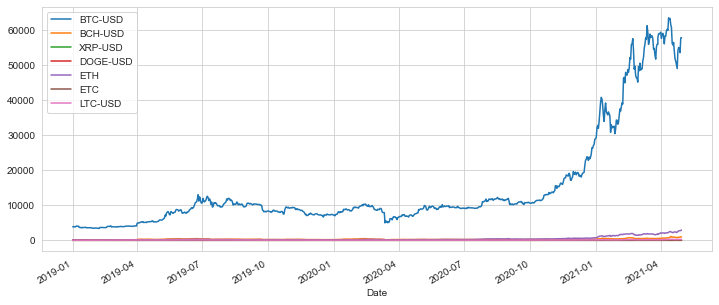

In [13]:
for tick in tickers:
    Crypto[tick]['Adj Close'].plot(label = tick, figsize = (12,5))
plt.legend()

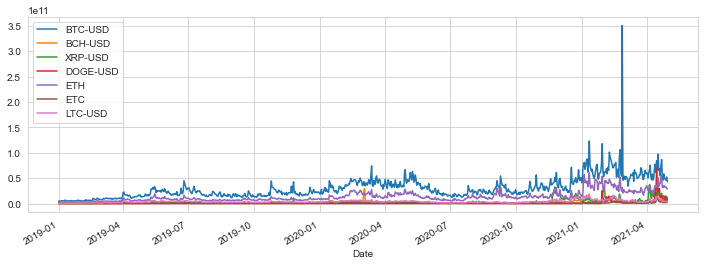

In [14]:
for tick in tickers:
    Crypto[tick]['Volume'].plot(label = tick, figsize = (12,4))
plt.legend()

<AxesSubplot:xlabel='Consumer Ticker', ylabel='Consumer Ticker'>

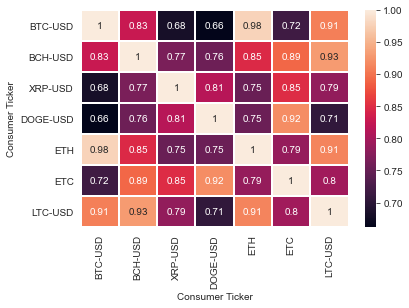

In [15]:

# Create heatmap
sns.heatmap(Crypto.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(),annot = True,lw = 1)

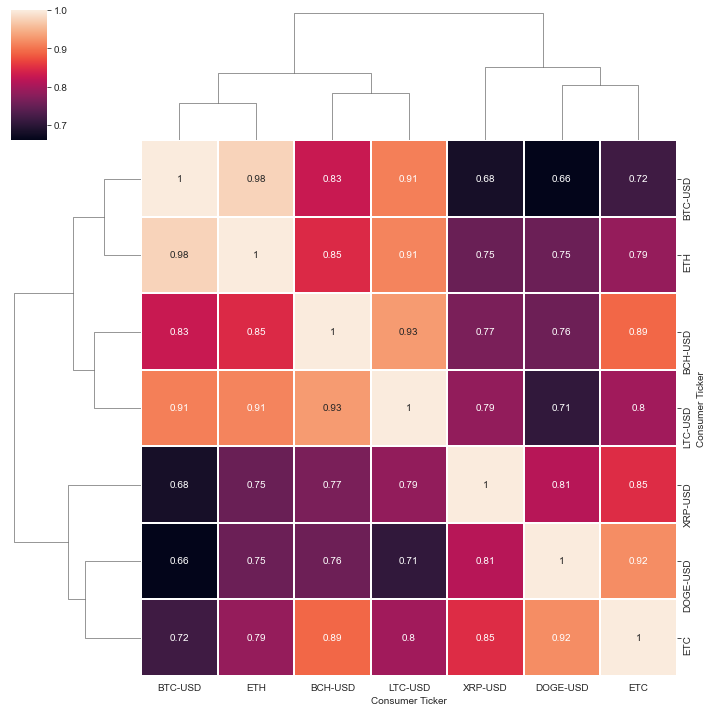

In [16]:

# Create cluter map
sns.clustermap(Crypto.xs(key = 'Close', axis = 1, level = 'Stock Info').corr(), annot = True, lw = 1)